In [88]:
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd

plt.rc('font',family='Times New Roman')

In [89]:
# 按照metric统计，每个metric一个子图
# metrics = ["Precision", "Recall", "AUPR", "AUROC"]
metrics = ["AUPR", "F1", "AUROC"]
species = ['mouse', 'fly', 'worm', 'yeast', 'ecoli', 'human']
xlabel = ['Mouse', 'Fly', 'Worm', 'Yeast', 'E.coli', 'Human']


results_dir = "/Users/ys/workspace/ExplainablePPI/results/dscript"
models = {
    "rnn_model": [],
    "naive_model": ["naive_ppi", "naive_ppi-woppm"], 
    "regular_model": ["ppi", "ppi-woppm",  "naive_ppi"]
    # "regular_model": ["ppi", "ppi-woppm", "rnn", "rnn-woppm"]
    }
legend = {"ppi": "PPITrans", "ppi-woppm": "PPITrans-ProtT5", "rnn": "PPIGRU", "naive_ppi": "PPITrans-Transformer"}

naive_pd = {m: pd.DataFrame(columns=species, index=metrics) for m in models['naive_model']}
regular_pd = {m: pd.DataFrame(columns=species, index=metrics) for m in models['regular_model']}
rnn_pd = {m: pd.DataFrame(columns=species, index=metrics) for m in models['rnn_model']}

def read_metric(df, model):
    metric_dir = os.path.join(results_dir, model, 'metric')
    for specie in species:
        metric_file = os.path.join(metric_dir, specie+"_test.eval")
        with open(metric_file, "r") as f:
            lines = [l.strip().split(":") for l in f.readlines()]
            for l in lines:
                m, v = l[0].strip(), l[1].strip()
                if m in metrics:
                    df[specie][m] = round(float(v), 2)
            

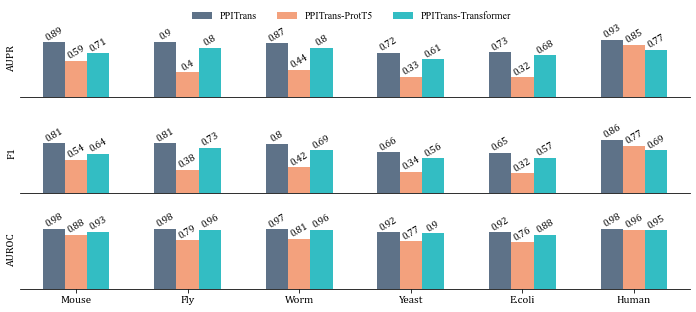

In [90]:
plt.close()
import matplotlib
font_path = "/Users/ys/Library/Fonts/Cambria.ttf"
font = matplotlib.font_manager.FontProperties(fname=font_path)

for model in models['regular_model']:
    read_metric(regular_pd[model], model)
# 绘制ppi图
fig, subs = plt.subplots(len(metrics), 1, figsize=(12, 5))
# colors = ["#00b8a9", "#48466d", "#ffde7d", "#3d84a8"]
colors = ["#364f6b", "#f08a5d", "#00adb5", "#3d84a8"]
width = 0.6
# 按照metric绘制子图
for mid in range(len(metrics)):    
    subs[mid].set_ylabel(metrics[mid], fontproperties=font, size=11)
    subs[mid].set_xlim(0.5, len(species)+0.5, 1)
    subs[mid].set_ylim(0, 1.3)
    subs[mid].set_yticks([])
    subs[mid].spines['top'].set_visible(False)
    subs[mid].spines['left'].set_visible(False)
    subs[mid].spines['right'].set_visible(False)

    if mid == len(metrics) - 1:
        subs[mid].xaxis.set_visible(True)
        subs[mid].set_xticks(range(1, len(species)+1), labels=xlabel, fontproperties=font, size=11)
    else:
        subs[mid].xaxis.set_visible(False)

    xs = {}
    values = {}
    models_num = len(models["regular_model"])
    for idx, model in enumerate(models["regular_model"]):
        values[model] = regular_pd[model].iloc[mid]
        xs[model] = np.arange(1, len(species)+1) - width/2 + width/models_num/2 + width/models_num * idx
        bar = subs[mid].bar(xs[model], values[model], width/models_num, color=colors[idx], alpha=0.8)
        bar.set_label(legend[model])
        subs[mid].bar_label(bar, rotation=30, fontproperties=font)

    if mid == 0:
        subs[mid].legend(loc=(0.25, 0.9), frameon=False, ncol=models_num)

plt.savefig("ablation.pdf", bbox_inches='tight')


In [91]:
# plt.close()
# # 读取metrics文件
# for model in models["rnn_model"]:
#     read_metric(rnn_pd[model], model)

# # 绘图rnn
# fig, subs = plt.subplots(len(metrics), 1, figsize=(12, 5))
# colors = ["#364f6b", "#f08a5d"]
# width = 0.4
# # 按照metric绘制子图
# for mid in range(len(metrics)):    
#     subs[mid].set_ylabel(metrics[mid])
#     subs[mid].set_xlim(0.5, len(species)+0.5, 1)
#     subs[mid].set_ylim(0, 1.2)
#     subs[mid].set_yticks([])
#     subs[mid].spines['top'].set_visible(False)
#     subs[mid].spines['left'].set_visible(False)
#     subs[mid].spines['right'].set_visible(False)

#     if mid == len(metrics) - 1:
#         subs[mid].xaxis.set_visible(True)
#         subs[mid].set_xticks(range(1, len(species)+1), labels=species)
#     else:
#         subs[mid].xaxis.set_visible(False)

#     xs = {}
#     values = {}
#     models_num = len(models["rnn_model"])
#     for idx, model in enumerate(models["rnn_model"]):
#         values[model] = rnn_pd[model].iloc[mid]
#         xs[model] = np.arange(1, len(species)+1) - width/2 + width/models_num/2 + width/models_num * idx
#         bar = subs[mid].bar(xs[model], values[model], width/models_num, color=colors[idx])
#         bar.set_label(model)
#         subs[mid].bar_label(bar, rotation=45)

#     if mid == 1:
#         subs[mid].legend(loc=(0.48, 0.85), frameon=False, ncol=models_num)

# plt.savefig("./experiments/0.ablation_study/rnn_model.pdf", bbox_inches='tight')


In [92]:
# # 读取metrics文件
# for model in models["naive_model"]:
#     read_metric(naive_pd[model], model)

# # 绘制naive_ppi图
# fig, subs = plt.subplots(len(metrics), 1, figsize=(12, 5))
# colors = ["#364f6b", "#f08a5d"]
# width = 0.4
# # 按照metric绘制子图
# for mid in range(len(metrics)):    
#     subs[mid].set_ylabel(metrics[mid])
#     subs[mid].set_xlim(0.5, len(species)+0.5, 1)
#     subs[mid].set_ylim(0, 1.2)
#     subs[mid].set_yticks([])
#     subs[mid].spines['top'].set_visible(False)
#     subs[mid].spines['left'].set_visible(False)
#     subs[mid].spines['right'].set_visible(False)

#     if mid == len(metrics) - 1:
#         subs[mid].xaxis.set_visible(True)
#         subs[mid].set_xticks(range(1, len(species)+1), labels=species)
#     else:
#         subs[mid].xaxis.set_visible(False)

#     xs = {}
#     values = {}
#     models_num = len(models["naive_model"])
#     for idx, model in enumerate(models["naive_model"]):
#         values[model] = naive_pd[model].iloc[mid]
#         xs[model] = np.arange(1, len(species)+1) - width/2 + width/models_num/2 + width/models_num * idx
#         bar = subs[mid].bar(xs[model], values[model], width/models_num, color=colors[idx])
#         bar.set_label(model)
#         subs[mid].bar_label(bar, rotation=45)

#     if mid == 1:
#         subs[mid].legend(loc=(0.48, 0.85), frameon=False, ncol=models_num)

# plt.savefig("./experiments/0.ablation_study/naive_model.pdf", bbox_inches='tight')
